### Basic forward-design example
Demonstrate the basic input format that can be used for forward design.
Designs can have fused regions and holes, specified by the `fusedPts` and `holePts`, respectively.

The provided design doesn't do anything interesting...

In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

V, E = mesh.load_raw('data/ForwardDesign/mystructure.obj')
fusedPts = list(np.loadtxt('data/ForwardDesign/mystructure_fusedPts.txt').reshape((-1, 2)))
holePts  = list(np.loadtxt('data/ForwardDesign/mystructure_holePts.txt').reshape((-1, 2)))

m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

In [ ]:
# Load your custom mesh and point files
V, E = mesh.load_raw('data/ForwardDesign/mystructure.obj')
print(f"Loaded mesh with {len(V)} vertices and {len(E)} edges")
print(f"Vertex coordinates: {V}")
print(f"Edge connections: {E}")

# Load fused and hole points
try:
    fusedPts = list(np.loadtxt('data/ForwardDesign/mystructure_fusedPts.txt').reshape((-1, 2)))
    print(f"Loaded {len(fusedPts)} fused points: {fusedPts}")
except:
    fusedPts = []
    print("No fused points found, using empty list")
    
try:
    holePts = list(np.loadtxt('data/ForwardDesign/mystructure_holePts.txt').reshape((-1, 2)))
    print(f"Loaded {len(holePts)} hole points: {holePts}")
except:
    holePts = []
    print("No hole points found, using empty list")

# Create the inflatable sheet mesh
print("Creating inflatable sheet mesh...")
triArea = np.prod(utils.bbox_dims(V)[0:2]) / 1e4
print(f"Triangle area parameter: {triArea}")

try:
    m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, triArea)
    print(f"Successfully created mesh with {m.numVertices()} vertices and {m.numTris()} triangles")
    isheet = inflation.InflatableSheet(m, iwv)
    print("Successfully created inflatable sheet")
except Exception as e:
    print(f"Error creating mesh: {e}")
    print("This might be due to:")
    print("1. Invalid mesh structure (dangling vertices)")
    print("2. Hole points inside the mesh boundary")
    print("3. Fused points outside the mesh boundary")
    raise

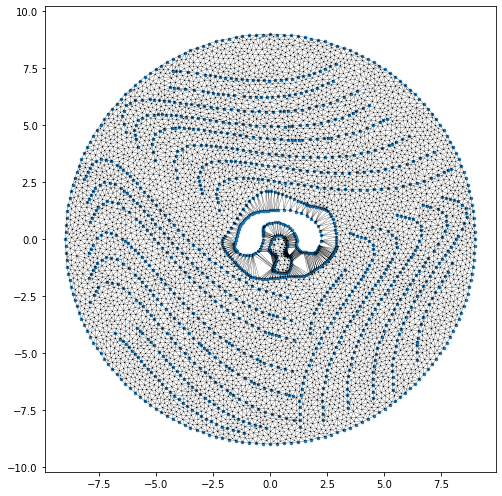

In [4]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

In [5]:
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

In [6]:
import time
benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1
framerate = 5 # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()
cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.00403595	1
Newton iterations	252.453	1
    InflatableSheet energy	0.00149918	1
    InflatableSheet gradient	0.00250983	1
    Newton iterate	252.445	500
        Backtracking	2.88	500
            InflatableSheet energy	0.521673	903
            InflatableSheet setVars	2.31527	903
        Compute descent direction	241.601	500
            Negative curvature dir	85.2143	218
                negativeCurvatureDirection	84.6887	218
                    CHOLMOD Backsub	74.5033	42510
                    CHOLMOD Numeric Factorize	0.181372	218
                    CHOLMOD Symbolic Factorize	1.80709	218
            newton_step	156.375	500
                Newton solve	143.617	910
                    CHOLMOD Numeric Factorize	136.76	909
                    Solve	2.91534	501
                        CHOLMOD Backsub	2.63803	500
                        CHOLMOD Numeric Factorize	0.0530829	1
                        CHOLMOD Symbolic Factorize	0.167139	1
                hessEval	12.2508